In [34]:
import pandas as pd
from scipy import integrate
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20,7)

# read the measurements file

In [32]:
data_frame = pd.read_csv("~/deep_sleep_15min.csv", sep=" ", names=["time_ms", "current_mA"])
data_frame = data_frame[data_frame.time_ms < 9000000]
data_frame.describe()

,time_ms,current_mA
count,4.673300e+06,4.673300e+06
mean,5.198025e+06,1.241533e-01
std,3.015905e+06,2.741254e+00
min,1.200000e+01,-2.727000e-02
25%,2.582997e+06,2.273000e-02
50%,5.196164e+06,3.182000e-02
75%,7.809818e+06,4.091000e-02
max,1.043549e+07,1.454545e+02


In [33]:
data_frame.tail()

,time_ms,current_mA
4673295,10435485,0.01818
4673296,10435488,0.04091
4673297,10435490,0.04091
4673298,10435492,0.04545
4673299,10435494,0.02700


In [15]:
def calc_AmpereSecFromDataFrame(df):
    return integrate.trapz(df.current_mA.div(1000), df.time_ms.div(1000))


def calc_load_coulomb_str(df):
    load = calc_AmpereSecFromDataFrame(df)
    return "Q = {:.4f} As".format(load)

# Deep sleep

/Users/DEV/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  after removing the cwd from sys.path.


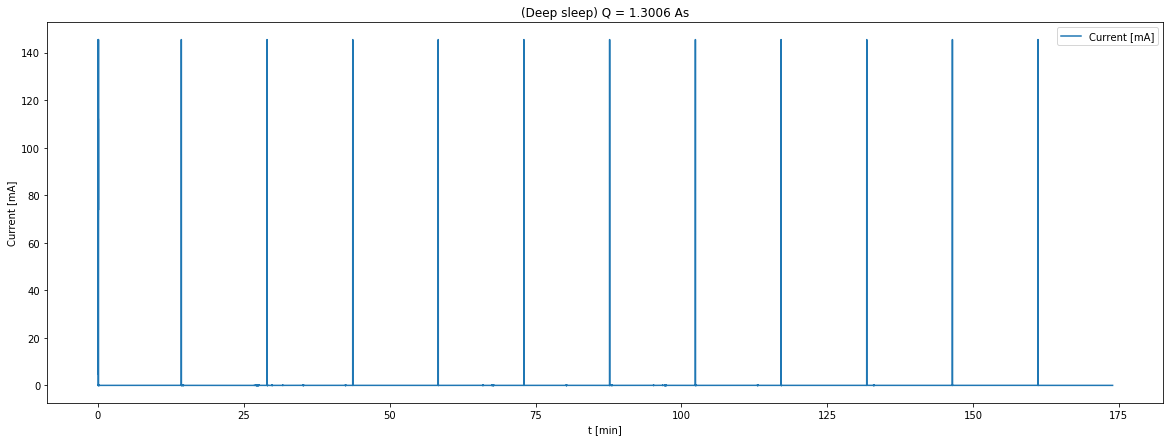

In [18]:
plt.title("(Deep sleep) " + calc_load_coulomb_str(data_frame))
plt.xlabel("t [min]")
plt.ylabel("Current [mA]")
plt.plot(data_frame.time_ms[:, None] / 60000, data_frame.current_mA[:, None], label="Current [mA]")
plt.legend()
plt.show()

# Light sleep

In [26]:
df_light_sleep = pd.read_csv("~/light_sleep_15min.csv", sep=" ", names=["time_ms", "current_mA"])
df_light_sleep = df_light_sleep[df_light_sleep.current_mA < 500]
df_light_sleep = df_light_sleep[df_light_sleep.time_ms < 10435494]
df_light_sleep.describe()

,time_ms,current_mA
count,4.616324e+06,4.616324e+06
mean,5.197445e+06,2.036407e+01
std,3.016496e+06,3.095266e+01
min,1.200000e+01,6.590900e-01
25%,2.581658e+06,1.045450e+00
50%,5.195447e+06,1.386360e+00
75%,7.809880e+06,1.722727e+01
max,1.043549e+07,1.454545e+02


/Users/DEV/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  after removing the cwd from sys.path.


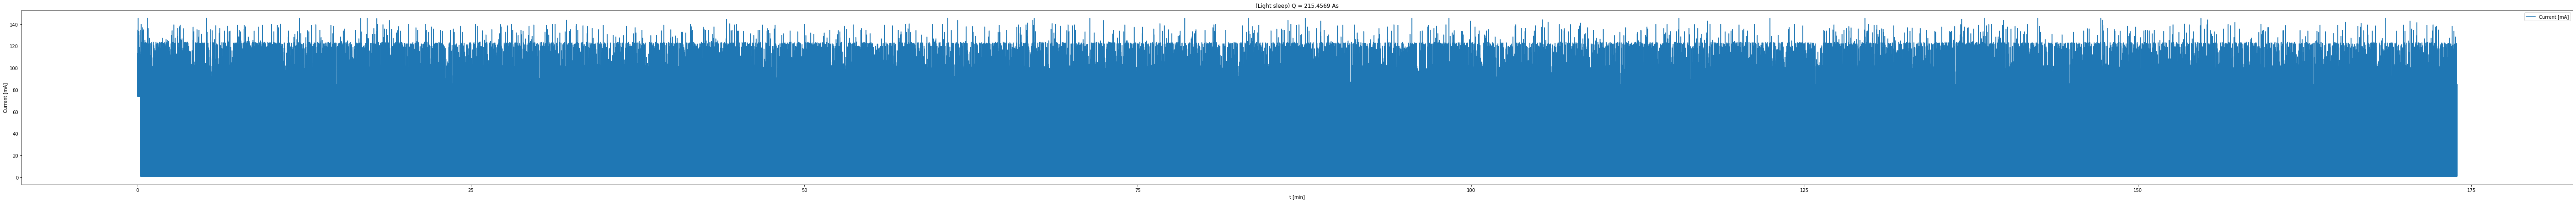

In [31]:
plt.title("(Light sleep) " + calc_load_coulomb_str(df_light_sleep))
plt.xlabel("t [min]")
plt.ylabel("Current [mA]")
plt.plot(df_light_sleep.time_ms[:, None] / 60000, df_light_sleep.current_mA[:, None], label="Current [mA]")
plt.legend()
plt.show()

# Modem sleep

/Users/DEV/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """


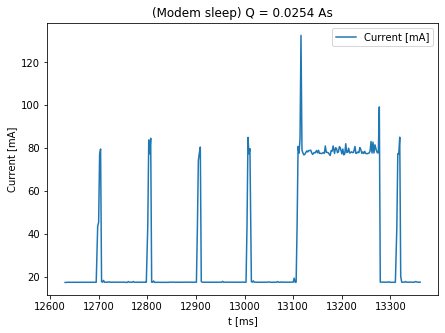

In [5]:
df_modem_sleep = data_frame[3000:3350]
plt.title("(Modem sleep) " + calc_load_coulomb_str(df_modem_sleep))
plt.xlabel("t [ms]")
plt.ylabel("Current [mA]")
plt.plot(df_modem_sleep.time_ms[:, None], df_modem_sleep.current_mA[:, None], label="Current [mA]")
plt.legend()
plt.show()

# Beacon interval

/Users/DEV/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """


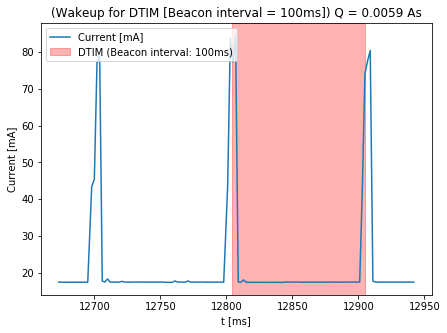

In [71]:
df_dtim = data_frame[3020:3150]
plt.title("(Wakeup for DTIM [Beacon interval = 100ms]) " + calc_load_coulomb_str(df_dtim))
plt.xlabel("t [ms]")
plt.ylabel("Current [mA]")
plt.plot(df_dtim.time_ms[:, None], df_dtim.current_mA[:, None], label="Current [mA]")
plt.axvspan(12804, 12905, color='red', alpha=0.3, label="DTIM (Beacon interval: 100ms)")
plt.legend(loc="upper left")
plt.show()

# Light sleep

In [23]:
df_light_sleep = pd.read_csv("light_sleep.csv", sep=" ", names=["time_ms", "current_mA"])
df_light_sleep.describe()

,time_ms,current_mA
count,5771.000000,5770.000000
mean,5987.733495,36.119192
std,3477.598933,37.344620
min,1.000000,0.872730
25%,2975.000000,1.177270
50%,5976.000000,17.390910
75%,8987.500000,78.412503
max,12061.000000,145.454540


/Users/DEV/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """


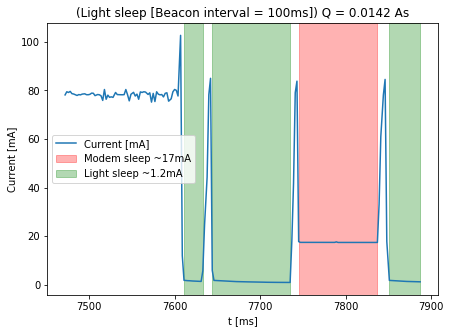

In [58]:
df_light_sleep_short = df_light_sleep[3600:3800]
plt.title("(Light sleep [Beacon interval = 100ms]) " + calc_load_coulomb_str(df_light_sleep_short))
plt.xlabel("t [ms]")
plt.ylabel("Current [mA]")
plt.plot(df_light_sleep_short.time_ms[:, None], df_light_sleep_short.current_mA[:, None], label="Current [mA]")
plt.axvspan(7745, 7837, color='red', alpha=0.3, label="Modem sleep ~17mA")
plt.axvspan(7611, 7633, color='green', alpha=0.3, label="Light sleep ~1.2mA")
plt.axvspan(7644, 7735, color='green', alpha=0.3)
plt.axvspan(7851, 7887, color='green', alpha=0.3)
plt.legend()
plt.show()

# Deep sleep

In [72]:
df_deep_sleep = pd.read_csv("deep_sleep.csv", sep=" ", names=["time_ms", "current_mA"])
df_deep_sleep.describe()

,time_ms,current_mA
count,16687.000000,16687.000000
mean,17620.706658,49.212474
std,10278.288107,38.886063
min,12.000000,0.000000
25%,8702.500000,0.040910
50%,17577.000000,78.550000
75%,26491.000000,79.122730
max,35490.000000,145.454540


/Users/DEV/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """


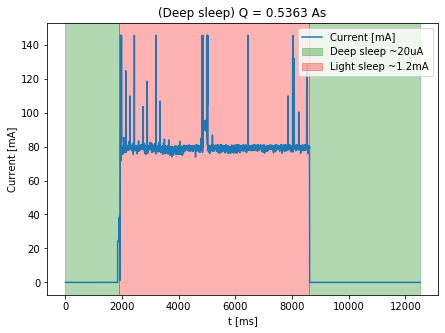

In [89]:
df_deep_sleep_short = df_deep_sleep[0:6000]
plt.title("(Deep sleep) " + calc_load_coulomb_str(df_deep_sleep_short))
plt.xlabel("t [ms]")
plt.ylabel("Current [mA]")
plt.plot(df_deep_sleep_short.time_ms[:, None], df_deep_sleep_short.current_mA[:, None], label="Current [mA]")
plt.axvspan(0, 1900, color='green', alpha=0.3, label="Deep sleep ~20uA")
plt.axvspan(1900, 8600, color='red', alpha=0.3, label="Light sleep ~1.2mA")
plt.axvspan(8600, 12500, color='green', alpha=0.3)
plt.legend()
plt.show()